# (Cameras dataset Exploration)
## by (Elsayed Mokhtar Elsayed Abd Elrahman Zahy)


## Investigation Overview

> I think ongoing data analysis process differs depending on situation, for example, analyzing data for a supplier not the same as for a customer ,and even for a customer with basic list of devices and need to figure out which deal is best for this list is different from a customer without list but has a main interest in one feature and needs to know from the start what features achieves that goal or in other words what my feature of interest rely on, to put in consideration when taking decisions or for further conclusions techniques .

> In today's situation, analyzing and investigating dataset for a kind of electronic devices "cameras" to figure out how their price differs and based on which features to put in consideration for analysis or futher conclusion technique. So, we are going to answer our main question :

> > "Overall Question" : What does change of price depend on, based on this dataset ?  


## Dataset Overview

> Camera dataset from 'Kaggle.com' describes cameras information from different manufactures within period (1994:2007) evolving ten technological features, camera model, release date and price, gathered as some camera enthusiast went and described 1,000 cameras based on 13 properties! .

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df=pd.read_csv('camera_dataset.csv')
df1=pd.read_csv('df1.csv')
df2=pd.read_csv('df2.csv')
dff1=pd.read_csv('dff1.csv')
dff2=pd.read_csv('dff2.csv')

### What is the structure of your dataset?

> 773 rows * 14 columns : can be categorized as qualitative "supplier_name", "device_name", discrete "Release_date" [1998:2007], quantitive technological features('Max_resolution', 'Low_resolution', 'Effective_pixels', 'Zoom_wide(W)', 'Zoom_tele(T)', 'Normal_focus_range', 'Macro_focus_range', 'Storage_included', 'Weight(inc.batteries', 'Dimensions') and continuous "Price" .




### What is/are the main feature(s) of interest in your dataset?

> Price is the main feature of interest and how it's related to other features .

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think for first glimpse, that ("supplier_name", "Release_date", and all ten Technological features "'Max_resolution', 'Low_resolution', 'Effective_pixels','Zoom_wide(W)', 'Zoom_tele(T)', 'Normal_focus_range','Macro_focus_range', 'Storage_included', 'Weight(inc.batteries)','Dimensions'" ) could be related to change in price .

###### Limitations :

- I think adding life_cycle feature to describe if device is still in production "Active" or not "Obsolete" would be really helpful to measure price change based on life cycle status and other supply_chain data which i think would be related also . 

### Now let's check univariates more precisely :
> > Question: What are the properties of each cameras feature distribution?

### Price distribution :
###### Q: How would most cameras prices range be? and how much cameras offered in high price ? 

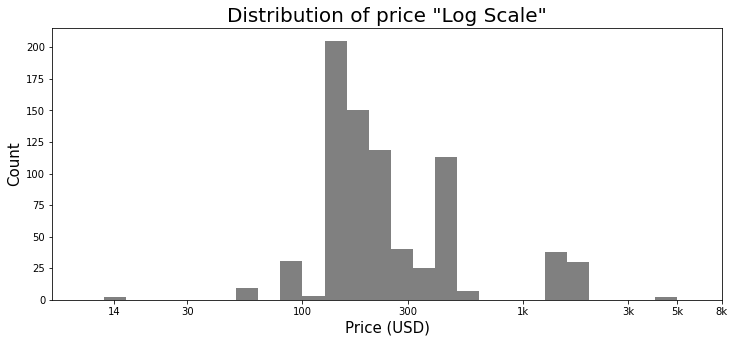

In [3]:
#Transforming price in log-scale to have more normally distribution verifying count for each price range
plt.figure(figsize=[12,5]);
bins=np.arange(1,df1.log_price.max()+.1,.1)
plt.hist(df1.log_price,bins=bins,color='grey')
a=np.log10([14,30,100,300,1000,3000,5000,8000])
c=['14','30','100','300','1k','3k','5k','8k']
plt.xticks(a,c);
plt.title('Distribution of price "Log Scale"',size=20);
plt.xlabel('Price (USD)',size=15);
plt.ylabel('Count',size=15);

###### Observation:  
 > We notice that cameras price is mainly peaked inbetween (100:600)USD while having some outliers inbetween (1500:2000)USD with high outliers of few cameras around (5000)USD .

##### Supplier-Name distribution:

> >Q: Which manufacturer dominates highest market share for offered cameras ? 


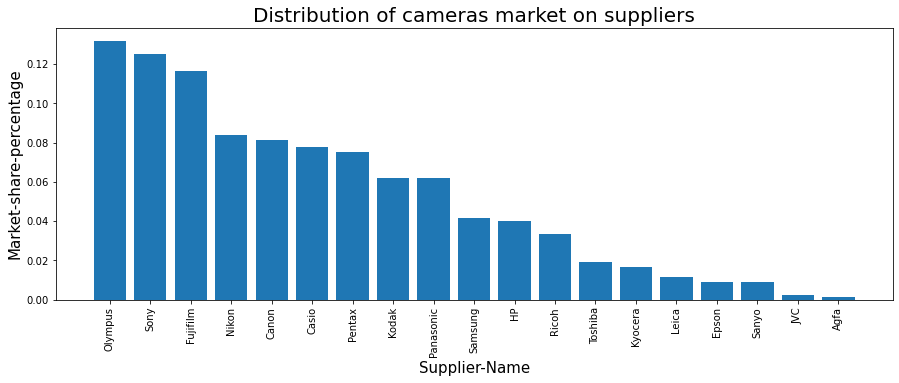

In [4]:
# drawing bar plot for suppliers against relative frequency
plt.figure(figsize=[15,5]);
c=df1.supplier_name.value_counts()
c=c.reset_index(name='count')
c['Market_Percentage']=c['count']/c['count'].sum()
c['Supplier_name']=c['index']
plt.bar(data=c,x='Supplier_name',height='Market_Percentage');
plt.xticks(rotation=90);
plt.title('Distribution of cameras market on suppliers',size=20);
plt.xlabel('Supplier-Name' ,size=15);
plt.ylabel('Market-share-percentage',size=15);


###### Observation:  

> As observed first ten suppliers till "Samsung" dominate 85.77% of market share based on this dataset, thus, they control cameras market prices. While, first three suppliers "Olympus, Sony, Fujifilm" dominate 37.39% of market share with highest share of Olympus with  percentage of 13.2 % .


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> We can summarize that cameras price data distribution has high aggregation inbetween (100:600)USD and a gap till next outliers inbetween(1500:2000)USD and extreme outliers of Panasonic and Olympus around (5000)USD .


> Our feature of interest which is price has right skewed distribution so it needed to be transformed and scaled to have it's distribution with multiplicative intervals rather than arithematic to look more normally, i have applied "Log-Scale" transformation .

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> We can summarize that cameras Technological features data distribution has high aggregation inbetween specific narrow ranges or discrete in nature with high outliers either with both high and low outliers .

> We can summarize that cameras suppliers and Release years are ordinal data with highest manufacturer record for 'Olympus' and with highest year count for "2007" and decreases gradually .

> For non discrete quantitative "Technological" features, distributions looked skewed and transformations is needed to see this distribution more normally based on multiplicative changes rather than arithmatic and to have more robust linear relationships if possible, with change in price since it's our feature of intereset and applied as follows :
-  'Max_resolution' , 'Low_resolution' , 'Storage_included' , 'Weight(inc.batteries)' : will follow log-scale transformation
-  'Zoom_wide(W)' ,'Normal_focus_range' , 'Macro_focus_range' , 'Dimensions' : will follow sqrt-scale transformation
-  'Zoom_tele(T)' : will follow cbrt-scale transformation.
-  'Effective_pixels' : discrete data will remain the same.

## Bivariate Exploration
> > Question : How correlated are the relationships between price and other features? and if correlated, in which direction?!

### Price VS Supplier-name

> > Q: Is change in price related to Cameras' manufacturers? Since, Brand-Name always has impact on all markets and products around .


###### Modification : 
- To illustrate price change along with suppliers we need to apply a modification to our dataset, filtering only first 11 suppliers that dominate more than (85%) of data sothat, we shall make price change more significant.

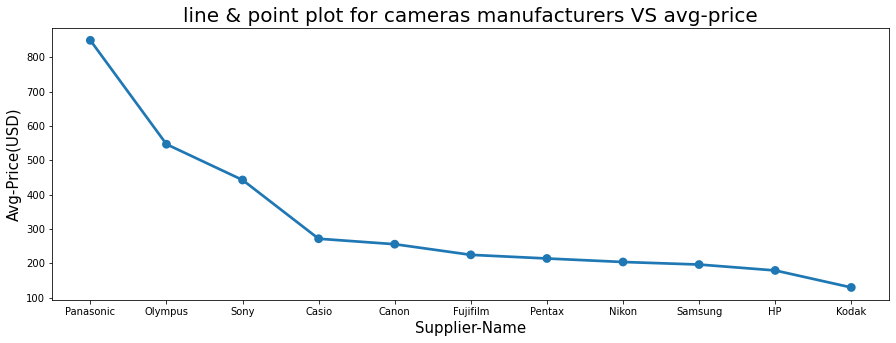

In [5]:
#drawing lineplot for each supplier against avg-price that offers for cameras
plt.figure(figsize=[15,5]);
sd=dff1.groupby(['supplier_name'])['Price'].mean()
sd=sd.reset_index(name='Avg_price')
order=dff1.groupby(['supplier_name'])['Price'].mean().sort_values(ascending=False).index
sb.pointplot(data=sd,x='supplier_name',y='Avg_price',order=order);
plt.title('line & point plot for cameras manufacturers VS avg-price',size=20);
plt.ylabel('Avg-Price(USD)'  ,size=15);
plt.xlabel('Supplier-Name',size=15);


###### Observation:  

- We can notice that price changes significantly with respect to cameras manufacturer as it records highest range of cameras prices for 'Panasonic', standard price for 'HP' and almost standard with lowest record for 'Kodak' and from violin plots distributions we can see that distribution of the parts along with price for each supplier almost uniform against prices except for 'HP','Kodak' has constant price range with whole distribution, and slightly deviated 'Casio'.
- We also can have preliminary recommendations for 'Nikon' and 'Samsung' since, they have a good range of price and their distribution suggests that it makes sense to find variety of offered cameras' technological features within this low range of price .
- From previous line plot, We assures what we have already illustrated, that price changes significantly with respect to supplier, With 'Panasonic', 'Olympus', 'Sony' for highest price records .

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> We can assure that change in price is only related with respect to suppliers what assures limitations of data for other important features that are related to price change like 'Life_cycle'.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> We can notice that max-resolution are related to low-resolution.

> We can notice that effictive-pixels are propotionally related to max-resolution and low-resolution which are related in nature what makes sense as resolution depends on camera shot quality.

> We can notice that camera weight "Weight(inc.batteries)" related to camera size "Dimensions" which is also rational .

## Multivariate Exploration

###### From Bivariate Exploration : We found that price is only related to supplier, so i prefer investigating each supplier offering technological features distributed along with respect to price and that what we are going on for next section .

> > Question: How is price related to technological features within each manufacturer ? Since, we try to record pattern
for change in price  by having a deeper look within each manufacturer data to eliminate change in price with respect to brands and record other relationships, if exists. 


##### Plotting heatmap for suppliers VS release-year counting for Avg-price .

> > Q: Is change in price related to cameras' production year within each supplier data? 



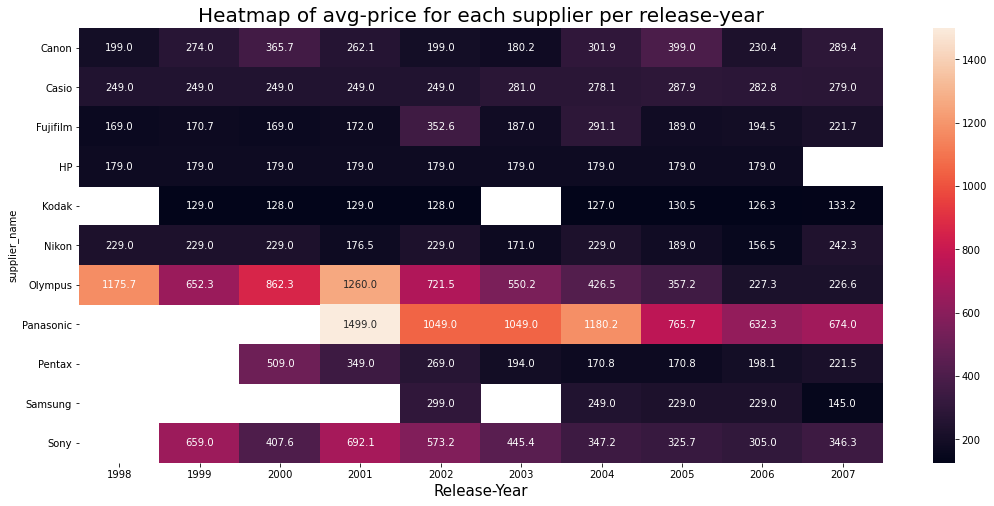

In [6]:
# Drawing Heatmap between supplier-name and release-date verifying avg-price 
plt.figure(figsize=[18,8]);
dr=dff1.groupby(['supplier_name','Release_date'])['Price'].mean()
dr=dr.reset_index(name='Avg_price')
dr=pd.pivot(data=dr,index='supplier_name',columns='Release_date',values='Avg_price')
sb.heatmap(dr,annot=True,fmt='0.1f');
plt.title('Heatmap of avg-price for each supplier per release-year',size=20);
plt.xlabel('Supplier-Name',size=15);
plt.xlabel('Release-Year',size=15);


#### From previous heatmap we can illustrate the price regions as indicated below :

> High price regions, mainly in "Panasonic" .

> High price regions, till 2003 for "Olympus" and "Sony" while price decreasing along within (2004:2007).

> Starting high price offering interprets irreasonability for some suppliers to have higher prices for lower properities .

> price change has no robust pattern across release years but we can generalize that price reduces gradually when moving forward with time .

> > We can assure that Release-Years has no significant pattern of price change.  

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> From Multivariate investigations we can outline that, price changes within supplier do not depend on technological features. since, they share the same technological ranges within different price ranges .

> > Hence, we still have supplier-name only the impactful feature on change in price. 

## Other Approachs : 

> Best year of price rating is "2006" and for variety of many cameras offerings .

> Best choice of supplier based on important technological features of ('resolution', 'Effective-pixels' and 'Storage-included') and putting lowest price range in consideration is "Samsung" .

> Otherwise, your choice will be independent of technological features regarding price and your choice would just be a matter of choosing your favorite trusted brand as according to this dataset price changes only based on supplier .


## Other Suggestions :

> While best camera choice based on this dataset regarding Effective-Pixels since, it has always absolute desire to be maximum and lowest possible Price is : "Z1275" camera from "Kodak" as it has highest Effective-Pixels (12 megapixels) and lowest possible Price (119 USD) and highest possible Storage (64 megabytes).

> While best camera choice based on this dataset regarding Storage-included since, it has always absolute desire to be maximum and lowest possible Price is : "i7" camera from "Samsung" as it has highest Storage-included (450 megabytes) and lowest possible Price (119 USD) and highest possible Storage (7 megapixels).



### Were there any interesting or surprising interactions between features?

> Yes, unlogical interpretation of interacted data as some suppliers offer higher price products with lower technological features which doesn't make sense, what outweighs our approache which states dataset limitations of missing price dependent features .

> But, last heatmap plot justified that starting with high price offering interprets irreasonability for some suppliers to have higher prices for lower properities as technology could get more enhanced and cheaper cross the time .

#### For further conclusions:
> > For machine learning algorithm  to predict price, i am afraid we have dependent features lackage as we only have 'supplier-name' to put in consideration.

> > For hypothesis testing to statistically figure out best overall supplier that guarantee attractive price range or average for overall offered cameras assuming this dataset as a sample of aggregations, we can use only supplier-name and price variables .


> Cameras dataset source : https://www.kaggle.com/crawford/1000-cameras-dataset

In [ ]:
!jupyter nbconvert slide_deck.ipynb --to slides --post serve --no-input --no-prompt